In [1]:
from models.TorchClassifier import TorchClassifier
from Embeddings import Embeddings
import time
import utils
from sklearn.model_selection import train_test_split
import torch
from pprint import pprint
from models.FFNN import FFNN

In [2]:
# Create the embeddings object
embeddings = Embeddings('../data/doc2vec.npy', '../data/bert.npy', '../data/authors.npy', '../data/authors_encoded.npy', '../pickles/author_encoder.pkl')

In [3]:
def run_ffnn(X, y, figure_title, scale_features=True):
    if scale_features:
        X = torch.from_numpy(utils.scale_feature_matrix(X)).float()
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    X_train, y_train = utils.over_sample(X_train, y_train)
    X_train, y_train = torch.from_numpy(X_train), torch.from_numpy(y_train)

    clf = TorchClassifier(FFNN, input_dim=768, hidden_dim=128, output_dim=20)
    # Find the best hyperparameters
    start = time.time()
    clf.train(X_train, y_train, epochs=30, lr=0.0001)
    print('Training time: ', time.time() - start)
    
    # Evaluate the model
    pprint(clf.evaluate(X_test, y_test))
    
    # Get the confusion matrix
    clf.get_confusion_matrix(X_test, y_test, figure_title)

    # stats of misclassified
    # incorrect_predictions = X_test[]

In [4]:
# Load the feature matrix and labels
X = embeddings.get_doc2vec(as_torch=True).float()
y = embeddings.get_labels(as_torch=True)

Epoch 1/30, Loss: 2.326202869415283
Epoch 2/30, Loss: 1.665199637413025
Epoch 3/30, Loss: 1.9160685539245605
Epoch 4/30, Loss: 1.6554332971572876
Epoch 5/30, Loss: 1.5460028648376465
Epoch 6/30, Loss: 0.974016010761261
Epoch 7/30, Loss: 1.09688401222229
Epoch 8/30, Loss: 1.219658374786377
Epoch 9/30, Loss: 2.1225500106811523
Epoch 10/30, Loss: 1.3600537776947021
Epoch 11/30, Loss: 1.3555855751037598
Epoch 12/30, Loss: 1.859368920326233
Epoch 13/30, Loss: 1.9450976848602295
Epoch 14/30, Loss: 1.6920201778411865
Epoch 15/30, Loss: 0.5601932406425476
Epoch 16/30, Loss: 1.34004807472229
Epoch 17/30, Loss: 3.2012557983398438
Epoch 18/30, Loss: 0.9439215064048767
Epoch 19/30, Loss: 2.53764271736145
Epoch 20/30, Loss: 0.8781660795211792
Epoch 21/30, Loss: 0.4620947539806366
Epoch 22/30, Loss: 1.6426665782928467
Epoch 23/30, Loss: 1.334185242652893
Epoch 24/30, Loss: 0.950722336769104
Epoch 25/30, Loss: 1.5447667837142944
Epoch 26/30, Loss: 0.44717302918434143
Epoch 27/30, Loss: 1.672865271568

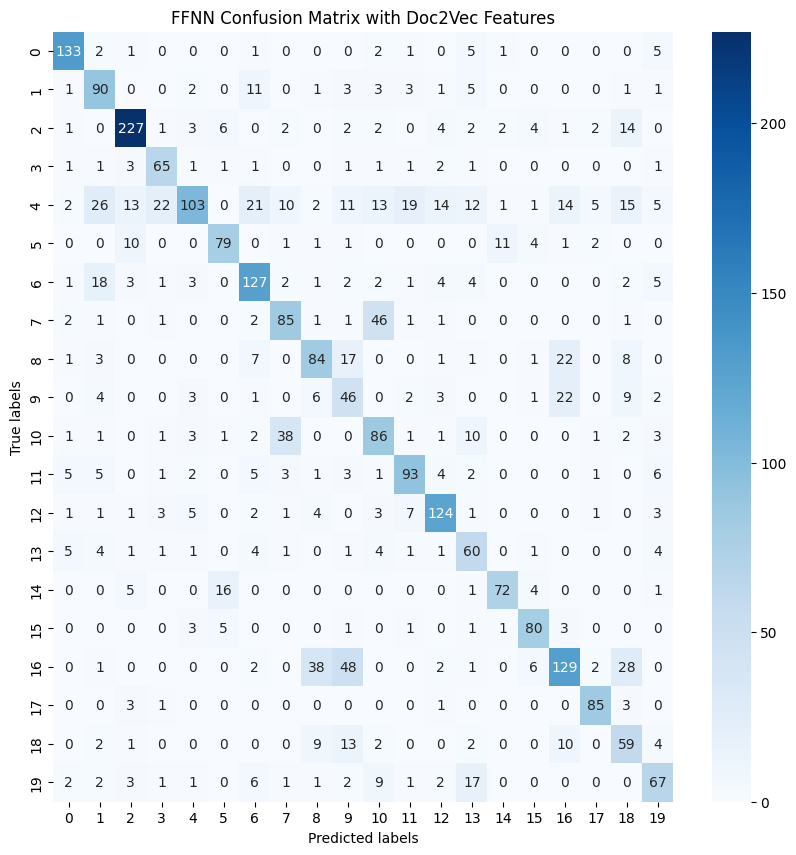

In [5]:
# Run the network with the Doc2Vec Features
run_ffnn(X, y, 'FFNN Confusion Matrix with Doc2Vec Features', scale_features=True)

In [6]:
# Load the BERT embeddings
X = embeddings.get_bert(as_torch=True).float()
y = embeddings.get_labels(as_torch=True)

Epoch 1/30, Loss: 1.7060335874557495
Epoch 2/30, Loss: 1.1232588291168213
Epoch 3/30, Loss: 1.5796865224838257
Epoch 4/30, Loss: 1.0789391994476318
Epoch 5/30, Loss: 1.216883897781372
Epoch 6/30, Loss: 0.6558016538619995
Epoch 7/30, Loss: 0.9675053954124451
Epoch 8/30, Loss: 0.9563376903533936
Epoch 9/30, Loss: 0.26524049043655396
Epoch 10/30, Loss: 0.4563608169555664
Epoch 11/30, Loss: 0.6912999749183655
Epoch 12/30, Loss: 0.4255959689617157
Epoch 13/30, Loss: 0.9423248767852783
Epoch 14/30, Loss: 0.3763567805290222
Epoch 15/30, Loss: 0.4026713967323303
Epoch 16/30, Loss: 0.3006901144981384
Epoch 17/30, Loss: 0.315186470746994
Epoch 18/30, Loss: 0.22983820736408234
Epoch 19/30, Loss: 0.10934018343687057
Epoch 20/30, Loss: 0.8490430116653442
Epoch 21/30, Loss: 0.5670244097709656
Epoch 22/30, Loss: 0.4100637137889862
Epoch 23/30, Loss: 0.3553166389465332
Epoch 24/30, Loss: 0.6722685694694519
Epoch 25/30, Loss: 1.1110734939575195
Epoch 26/30, Loss: 0.624334454536438
Epoch 27/30, Loss: 0.

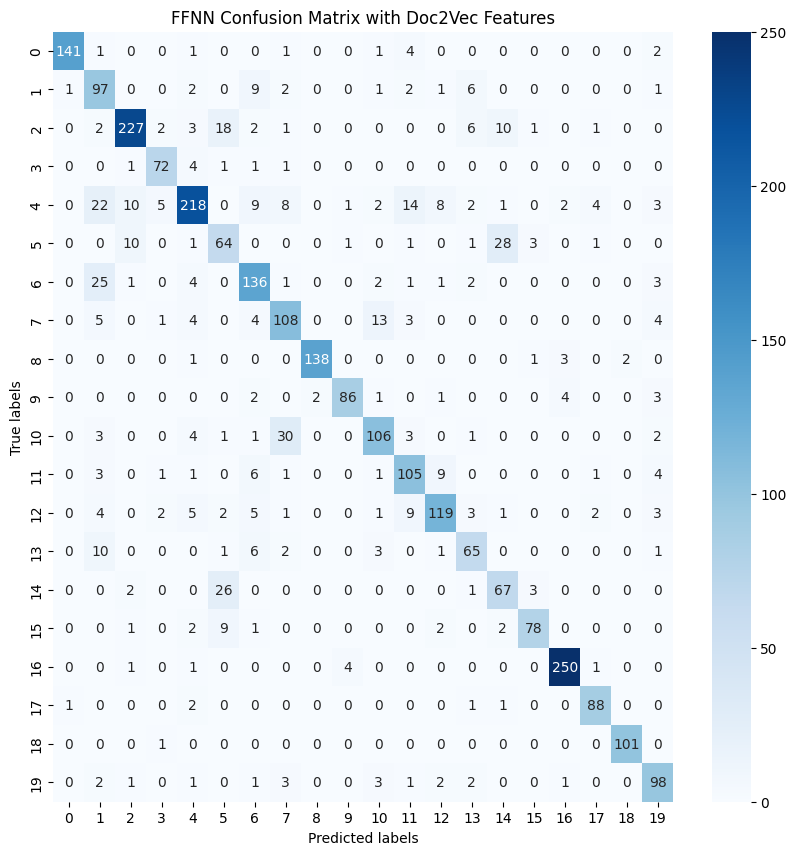

In [7]:
# Run the network with the BERT Features
run_ffnn(X, y, 'FFNN Confusion Matrix with Doc2Vec Features', scale_features=True)